### Bike Sharing  Model

### Problem Statement

BoomBikes, a company provides service in which bikes are made available for shared use to individuals on a short term basis for a price or free. They wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Goal

We need to build a model for demand of shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. Business can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
#Importing the required libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [3]:
#For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Set the row and column to max for display 
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

### Loading the data

In [9]:
data = pd.read_csv("day.csv")

In [10]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
data.shape

(730, 16)

In [12]:
#Number of missing values per column
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Data Cleaning

Missing Values: There is no missing value in the dataset

Lets observe each and every field in the data set.

In [13]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can clearly see there is no need for variables: instant, casual and registered. 

In [18]:
data.drop(columns=['instant','casual','registered'],axis=1,inplace=True)

In [19]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


dteday field has day, month and year information. As we already have fields for month and year, we can extract only day from this field. However day also not seems have good significance on our analysis except we want to understand if there is any impact on the sale weekly basis. 
So we will bin the days into following classes for our analysis.
- Day 01-07: Week1
- Day 08-14: Week2
- Day 15-21: Week3
- Day 22-28: Week4
- Day 29-31: Week5

In [23]:
data['date'] = data.dteday.apply(lambda x: x.split("/")[0])

In [24]:
data['date'] = data.date.apply(lambda x: x.split("-")[0])

In [26]:
data.drop(columns='dteday',axis=1,inplace=True)

In [28]:
data.date = data.date.astype('int')

In [30]:
data['weekofmonth'] = pd.cut(data.date,[0,7,14,21,28,31],labels=['week1','week2','week3','week4','week5'])

Now we can delete the date field as we don't need it further for our analysis.

In [32]:
data.drop(columns='date',axis=1,inplace=True)

#### mapping the categorical fields into correct format 

#### labelling season variable 

season is a categorical variable and it has four different values
- 1:spring, 
- 2:summer, 
- 3:fall, 
- 4:winter.

In [34]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [35]:
data.season = data.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [37]:
data.yr = data.yr.map({0:'2018',1:'2019'})

In [38]:
data.yr.dtype

dtype('O')

In [40]:
data.rename({'mnth':'month'},axis=1,inplace=True)

In [42]:
data.month = data.month.map({1: 'January',
                             2:'February',
                             3:'March',
                             4: 'April',
                             5: 'May',
                             6: 'June',
                             7: 'July',
                             8: 'August',
                             9: 'September',
                            10: 'October',
                            11: 'November',
                            12: 'December'})

In [45]:
data.weekday.value_counts().sort_index()

0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64

In [46]:
data.weekday = data.weekday.map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [48]:
data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [51]:
data.weathersit= data.weathersit.map({1:'Clear Weather',
                     2:'Cloudy',
                     3:'Light Rain'})

In [53]:
data.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


The numeric variab;es are: temp, atemp, hum and windspeed.

Lets plot the boxplot for these four variables. 

<AxesSubplot:title={'center':'Windspeed'}, xlabel='windspeed'>

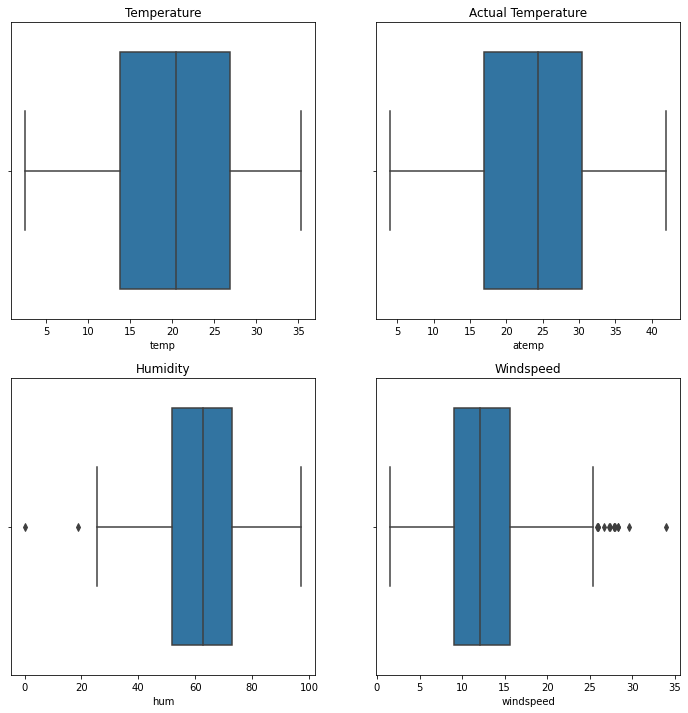

In [54]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Temperature')
sns.boxplot(data.temp)

plt.subplot(2,2,2)
plt.title('Actual Temperature')
sns.boxplot(data.atemp)

plt.subplot(2,2,3)
plt.title('Humidity')
sns.boxplot(data.hum)

plt.subplot(2,2,4)
plt.title('Windspeed')
sns.boxplot(data.windspeed)

Now, it can be seen that there is no outlier in temp and atemp. Also, Windspeed has some suspected outlier but windspeed can be 35 miles per hour in a windyday. Lets inspect the observation for humidity. 

In [56]:
data[data.hum<25]

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekofmonth
49,spring,2018,February,0,Saturday,0,Clear Weather,16.365847,19.5702,18.7917,34.000021,1635,week3
68,spring,2018,March,0,Thursday,1,Light Rain,15.952731,19.2834,0.0000,17.545759,623,week2


When humidity 18 still looks okay but zero is suspicious so lets delete this observation.

In [57]:
data=data[data.hum>15]

In [58]:
data.shape

(729, 13)

In [59]:
data

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekofmonth
0,spring,2018,January,0,Saturday,0,Cloudy,14.110847,18.181250,80.5833,10.749882,985,week1
1,spring,2018,January,0,Sunday,0,Cloudy,14.902598,17.686950,69.6087,16.652113,801,week1
2,spring,2018,January,0,Monday,1,Clear Weather,8.050924,9.470250,43.7273,16.636703,1349,week1
3,spring,2018,January,0,Tuesday,1,Clear Weather,8.200000,10.606100,59.0435,10.739832,1562,week1
4,spring,2018,January,0,Wednesday,1,Clear Weather,9.305237,11.463500,43.6957,12.522300,1600,week1
5,spring,2018,January,0,Thursday,1,Clear Weather,8.378268,11.660450,51.8261,6.000868,1606,week1
6,spring,2018,January,0,Friday,1,Cloudy,8.057402,10.441950,49.8696,11.304642,1510,week1
7,spring,2018,January,0,Saturday,0,Cloudy,6.765000,8.112700,53.5833,17.875868,959,week2
8,spring,2018,January,0,Sunday,0,Clear Weather,5.671653,5.808750,43.4167,24.250650,822,week2
9,spring,2018,January,0,Monday,1,Clear Weather,6.184153,7.544400,48.2917,14.958889,1321,week2


### Checking the linear relationship in the data

In [62]:
num_var_list = data.select_dtypes(include='number')

In [64]:
num_var_list.drop(columns=['holiday','workingday'],axis=1,inplace=True)

<AxesSubplot:>

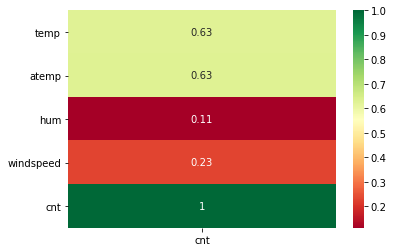

In [81]:
sns.heatmap(abs(num_var_list.corr()[['cnt']]),annot=True,cmap='RdYlGn')

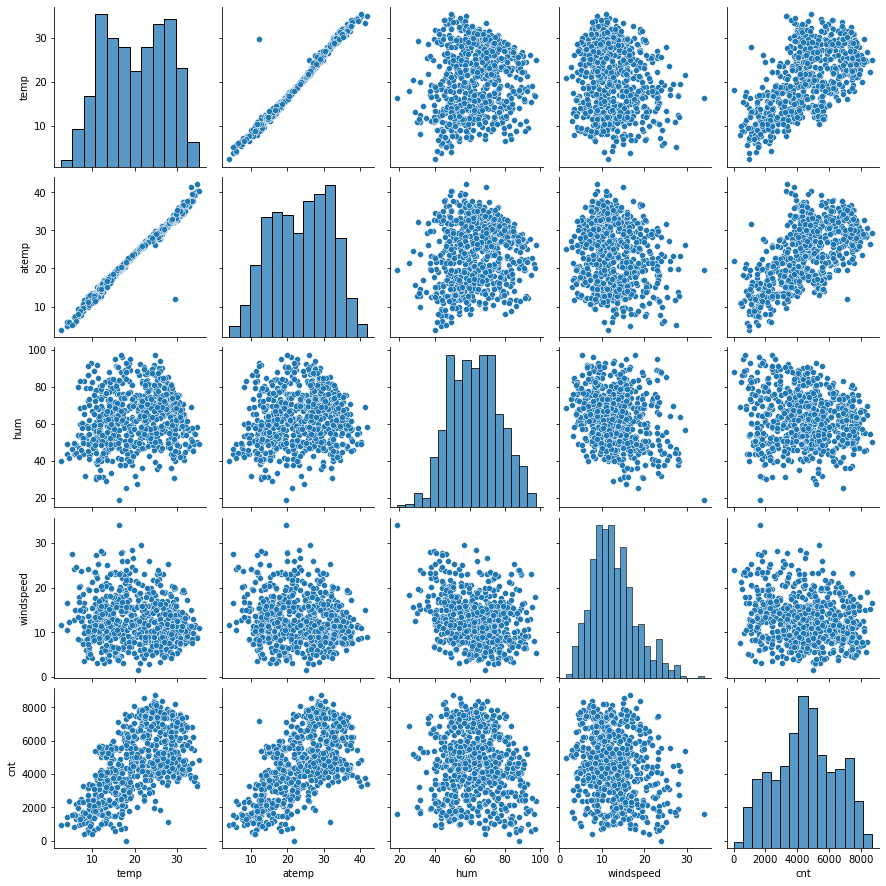

In [82]:
sns.pairplot(num_var_list)

In [77]:
type(abs(num_var_list.corr())['cnt'])

pandas.core.series.Series

We do see a high correlation between the target variable cnt and other dependent variables like temp and atemp. So linear model will work in our case.

Lets observe if there is any in cnt for categorical dependent variables. 

In [83]:
data.head()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekofmonth
0,spring,2018,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,week1
1,spring,2018,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,week1
2,spring,2018,January,0,Monday,1,Clear Weather,8.050924,9.47025,43.7273,16.636703,1349,week1
3,spring,2018,January,0,Tuesday,1,Clear Weather,8.200000,10.60610,59.0435,10.739832,1562,week1
4,spring,2018,January,0,Wednesday,1,Clear Weather,9.305237,11.46350,43.6957,12.522300,1600,week1


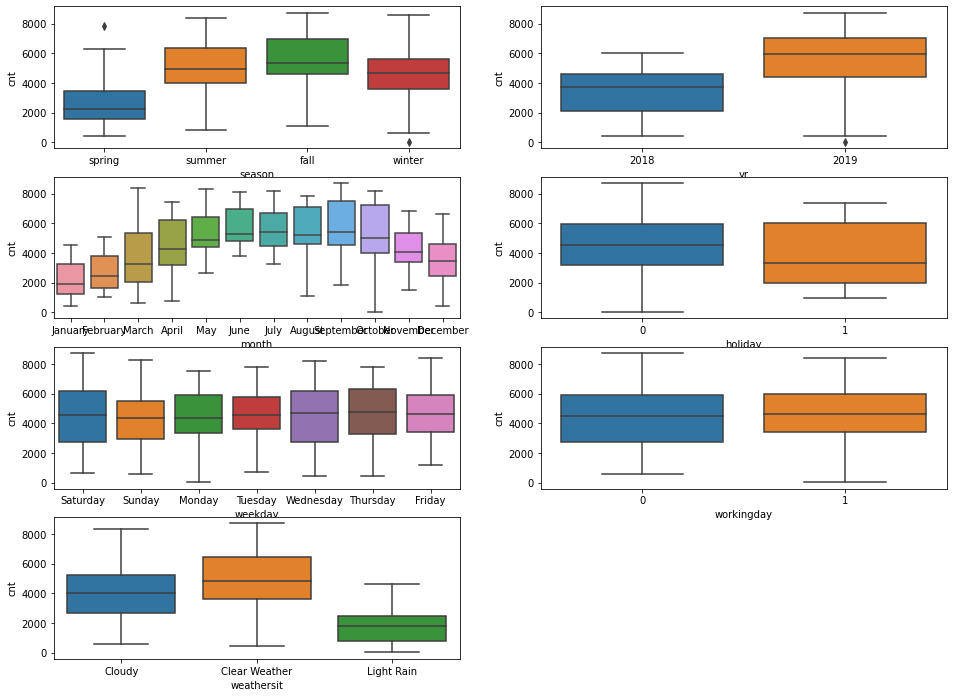

In [87]:
plt.figure(figsize=(16,12))

cat_var_list = ['season', 'yr', 'month', 'holiday', 'weekday', 'workingday','weathersit','weekofmonth']

for i in range(1,8):
    plt.subplot(4,2,i)
    sns.boxplot(x=cat_var_list[i-1],y='cnt',data=data)

Clearly some of the variables have good correlation with the some dependent categorical variables like weather condition, season and month

In [89]:
#lets dump the current status of the data 
import dill

In [90]:
dill.dump_session('notebook.db')

### Preprocessing of the data

Preprocessing includes: 
- Dummy variable creation. 
- Splitting the data into test and train datasets. 
- Scaling the data using training set. 

In [91]:
data.head()

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekofmonth
0,spring,2018,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,week1
1,spring,2018,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,week1
2,spring,2018,January,0,Monday,1,Clear Weather,8.050924,9.47025,43.7273,16.636703,1349,week1
3,spring,2018,January,0,Tuesday,1,Clear Weather,8.200000,10.60610,59.0435,10.739832,1562,week1
4,spring,2018,January,0,Wednesday,1,Clear Weather,9.305237,11.46350,43.6957,12.522300,1600,week1


In [94]:
cat_variable_list = ['season','month','weekday','weathersit','weekofmonth']

In [95]:
dummies_list = pd.get_dummies(data[cat_variable_list],drop_first=True)

In [96]:
dummies_list 

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week2,weekofmonth_week3,weekofmonth_week4,weekofmonth_week5
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [98]:
data.drop(columns=cat_variable_list,axis=1,inplace=True)

In [99]:
#Also lets change the year into 2018:0 and 2019:1. 
data.yr = data.yr.map({'2018':0,'2019':1})

In [102]:
data = pd.concat([data,dummies_list],axis=1)

In [103]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week2,weekofmonth_week3,weekofmonth_week4,weekofmonth_week5
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train Vs Test Split

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
data_train, data_test = train_test_split(data,train_size=0.70,test_size=0.30,random_state=100)

In [141]:
data_train.shape

(510, 34)

In [142]:
data_test.shape

(219, 34)

### scaling numerical variable 

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
scaler = MinMaxScaler()

In [145]:
num_var_list = ['temp','atemp','hum','windspeed','cnt']

In [146]:
data_train[num_var_list] = scaler.fit_transform(data_train[num_var_list])

In [147]:
data_train[num_var_list].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.540678,0.541209,0.571669,0.318011,0.496352
std,0.225277,0.221255,0.182541,0.170567,0.235715
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350497,0.357237,0.431818,0.192829,0.333213
50%,0.540519,0.552927,0.575578,0.296767,0.498008
75%,0.742223,0.731274,0.704680,0.414082,0.685832
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide X and y for model building 

In [148]:
y_train = data_train.pop('cnt')

In [149]:
X_train = data_train

In [150]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week2,weekofmonth_week3,weekofmonth_week4,weekofmonth_week5
626,1,0,1,0.614763,0.635584,0.450242,0.371638,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
364,0,0,0,0.437201,0.461603,0.552447,0.382342,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.460736,0.559440,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.210280,0.381387,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.411155,0.389456,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [151]:
y_train.head()

626    0.864421
364    0.247978
426    0.438851
728    0.164795
482    0.457443
Name: cnt, dtype: float64

In [152]:
X_train.shape

(510, 33)

### Feature selection

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [165]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [167]:
rfe = RFE(lm,n_features_to_select=20)
rfe= rfe.fit(X_train,y_train)

In [168]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('month_August', False, 10),
 ('month_December', True, 1),
 ('month_February', True, 1),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 9),
 ('month_March', False, 5),
 ('month_May', True, 1),
 ('month_November', True, 1),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 2),
 ('weekday_Thursday', False, 7),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1),
 ('weekofmonth_week2', False, 14),
 ('weekofmonth_week3', True, 1),
 ('weekofmonth_week4', False, 4),
 ('weekofmonth_week5', False, 11)]

In [173]:
features_selected_rfe = X_train.columns[rfe.support_]

In [174]:
import statsmodels.api as sm

In [179]:
X_train_sm1 = sm.add_constant(X_train[features_selected_rfe])

In [180]:
X_train_sm1.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_winter,month_December,month_February,month_January,month_July,month_May,month_November,month_September,weekday_Saturday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week3
626,1.0,1,0,1,0.614763,0.635584,0.450242,0.371638,0,0,0,0,0,0,0,0,1,0,0,0,1
364,1.0,0,0,0,0.437201,0.461603,0.552447,0.382342,1,0,1,0,0,0,0,0,0,1,0,0,0
426,1.0,1,0,0,0.442393,0.460736,0.559440,0.255342,1,0,0,0,0,0,0,0,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.210280,0.381387,0.663106,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.411155,0.389456,0.188475,0,0,0,0,0,0,0,0,0,1,1,0,0


In [181]:
X_train_sm1.shape

(510, 21)

In [182]:
lr1 = sm.OLS(y_train,X_train_sm1).fit()

In [189]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     144.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.20e-190
Time:                        20:20:00   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     489   BIC:                            -883.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [191]:
#Lets check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [194]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values,i) for i in range(X_train_sm1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,55.46
4,temp,53.87
5,atemp,52.19
8,season_spring,3.67
9,season_winter,2.46
12,month_January,2.15
6,hum,2.14
11,month_February,1.84
15,month_November,1.74
3,workingday,1.73


In [195]:
#As the atemp has very high VIF and p value is 0.369 so lets delete this field and remodel 
X_train_sm2 = X_train_sm1.drop(columns='atemp',axis=1)

In [196]:
lr2 = sm.OLS(y_train,X_train_sm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.43e-191
Time:                        20:38:41   Log-Likelihood:                 506.53
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     490   BIC:                            -888.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [197]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values,i) for i in range(X_train_sm2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,55.08
7,season_spring,3.67
4,temp,3.63
8,season_winter,2.43
11,month_January,2.15
5,hum,2.12
10,month_February,1.84
14,month_November,1.74
3,workingday,1.73
16,weekday_Saturday,1.64


In [198]:
X_train_sm3 = X_train_sm2.drop(columns='holiday',axis=1)

In [199]:
lr3 = sm.OLS(y_train,X_train_sm3).fit()

In [200]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     160.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.85e-192
Time:                        20:42:54   Log-Likelihood:                 505.99
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     491   BIC:                            -893.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [201]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values,i) for i in range(X_train_sm3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,54.49
6,season_spring,3.67
3,temp,3.62
7,season_winter,2.43
10,month_January,2.15
4,hum,2.12
9,month_February,1.83
13,month_November,1.70
16,weathersit_Cloudy,1.64
8,month_December,1.62


In [203]:
#Lets delete month_may 
X_train_sm4 = X_train_sm3.drop(columns='month_May',axis=1)

In [205]:
#Retrain the model
lr4 = sm.OLS(y_train,X_train_sm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.28e-192
Time:                        20:51:32   Log-Likelihood:                 503.68
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     492   BIC:                            -895.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [206]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm4.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm4.values,i) for i in range(X_train_sm4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,54.31
3,temp,3.61
6,season_spring,3.51
7,season_winter,2.29
10,month_January,2.15
4,hum,2.06
9,month_February,1.83
12,month_November,1.70
15,weathersit_Cloudy,1.63
8,month_December,1.62


In [207]:
#Lets delete the month_February
X_train_sm5 = X_train_sm4.drop(columns='month_February',axis=1)
lr5 = sm.OLS(y_train,X_train_sm5).fit()
print(lr5.summary())

#printing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm5.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm5.values,i) for i in range(X_train_sm5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sun, 27 Mar 2022   Prob (F-statistic):          1.84e-192
Time:                        20:55:48   Log-Likelihood:                 500.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     493   BIC:                            -895.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

,Features,VIF
0,const,52.50
3,temp,3.44
6,season_spring,2.81
7,season_winter,2.28
4,hum,2.06
11,month_November,1.67
14,weathersit_Cloudy,1.63
9,month_January,1.56
2,workingday,1.52
13,weekday_Saturday,1.52


In [208]:
#Lets delete the weekofmonth_week3
X_train_sm6 = X_train_sm5.drop(columns='weekofmonth_week3',axis=1)
lr6 = sm.OLS(y_train,X_train_sm6).fit()
print(lr6.summary())

#printing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm6.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm6.values,i) for i in range(X_train_sm6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     185.8
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          5.76e-192
Time:                        00:37:07   Log-Likelihood:                 496.67
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     494   BIC:                            -893.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

,Features,VIF
0,const,52.41
3,temp,3.43
6,season_spring,2.80
7,season_winter,2.28
4,hum,2.06
11,month_November,1.67
14,weathersit_Cloudy,1.62
9,month_January,1.56
2,workingday,1.52
13,weekday_Saturday,1.52


In [209]:
#Lets delete the month_December
X_train_sm7 = X_train_sm6.drop(columns='month_December',axis=1)
lr7 = sm.OLS(y_train,X_train_sm7).fit()
print(lr7.summary())

#printing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm7.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm7.values,i) for i in range(X_train_sm7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          2.59e-191
Time:                        00:38:48   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -954.7
Df Residuals:                     495   BIC:                            -891.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

,Features,VIF
0,const,51.16
3,temp,3.20
6,season_spring,2.80
4,hum,2.04
7,season_winter,2.04
13,weathersit_Cloudy,1.62
2,workingday,1.52
12,weekday_Saturday,1.52
8,month_January,1.48
10,month_November,1.43


In [210]:
#Lets delete the month_January
X_train_sm8 = X_train_sm7.drop(columns='month_January',axis=1)
lr8 = sm.OLS(y_train,X_train_sm8).fit()
print(lr8.summary())

#printing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm8.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm8.values,i) for i in range(X_train_sm8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          7.14e-192
Time:                        00:41:34   Log-Likelihood:                 490.90
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     496   BIC:                            -894.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

,Features,VIF
0,const,49.98
3,temp,3.08
6,season_spring,2.61
4,hum,2.04
7,season_winter,2.02
12,weathersit_Cloudy,1.61
2,workingday,1.52
11,weekday_Saturday,1.52
9,month_November,1.43
8,month_July,1.33


In [211]:
#Lets delete the month_November
X_train_sm9 = X_train_sm8.drop(columns='month_November',axis=1)
lr9 = sm.OLS(y_train,X_train_sm9).fit()
print(lr9.summary())

#printing VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm9.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm9.values,i) for i in range(X_train_sm9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     224.6
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          6.93e-192
Time:                        00:43:12   Log-Likelihood:                 488.12
No. Observations:                 510   AIC:                            -950.2
Df Residuals:                     497   BIC:                            -895.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

,Features,VIF
0,const,49.58
3,temp,3.04
6,season_spring,2.58
4,hum,2.04
7,season_winter,1.74
11,weathersit_Cloudy,1.61
2,workingday,1.52
10,weekday_Saturday,1.52
8,month_July,1.33
12,weathersit_Light Rain,1.30


We see R2 and Adjusted R2 has very same and close to 84%. Which means the model is able to explain 84% variability in the data and also as R2 and adjusted R2 are same there are not insignificant variable in the model. 

lets check the assumptions of linear model. 

### Assumptions

### Error terms are normally distributed 

In [213]:
y_pred = lr9.predict(X_train_sm9)

In [214]:
res = y_train - y_pred

<AxesSubplot:ylabel='Density'>

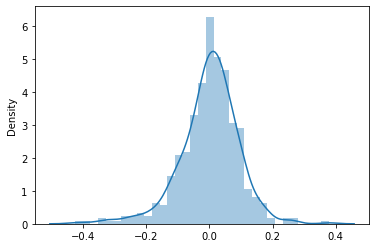

In [215]:
sns.distplot(res)

### Error term are heterogeneous with y_pred 

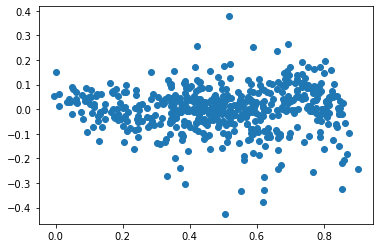

In [217]:
plt.scatter(y_pred,res)

In [219]:
#Taking back up of the model 
dill.dump_session('notebook.db')

### Making the prediction for test dataset

In [220]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week2,weekofmonth_week3,weekofmonth_week4,weekofmonth_week5
185,0,0,1,0.856704,0.810248,0.513011,0.214126,0.534169,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
639,1,0,1,0.662528,0.608096,0.871482,0.169219,0.531178,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
300,0,0,1,0.338555,0.314694,0.507169,0.426921,0.428555,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
222,0,0,1,0.820361,0.751420,0.300584,0.293574,0.548780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
153,0,0,1,0.698871,0.666902,0.211896,0.475661,0.608606,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [221]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Rain,weekofmonth_week2,weekofmonth_week3,weekofmonth_week4,weekofmonth_week5
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.031963,0.703196,0.551850,0.527643,0.555009,0.347202,0.508964,0.251142,0.273973,0.237443,0.073059,0.063927,0.100457,0.086758,0.095890,0.100457,0.059361,0.073059,0.082192,0.095890,0.068493,0.159817,0.155251,0.109589,0.123288,0.159817,0.141553,0.310502,0.041096,0.273973,0.214612,0.219178,0.063927
std,0.500513,0.176306,0.457896,0.235346,0.221756,0.176886,0.151346,0.217001,0.434663,0.447017,0.426491,0.260830,0.245183,0.301297,0.282125,0.295115,0.301297,0.236840,0.260830,0.275286,0.295115,0.253169,0.367276,0.362974,0.313092,0.329520,0.367276,0.349389,0.463759,0.198967,0.447017,0.411493,0.414637,0.245183
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.130111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336479,0.329183,0.422199,0.245522,0.362172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.561806,0.549198,0.541158,0.332073,0.520709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746636,0.695083,0.680621,0.425014,0.652324,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.983385,1.000000,1.000000,0.815378,0.943971,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So we can see test data is already scaled. 

In [229]:
#Lets delete the columns not required for lr9 model 
final_columns = list(X_train_sm9.columns)

In [231]:
final_columns.remove('const')

In [235]:
X_test = data_test[final_columns]

In [237]:
X_test_sm = sm.add_constant(X_test)

In [238]:
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,month_July,month_September,weekday_Saturday,weathersit_Cloudy,weathersit_Light Rain
185,1.0,0,1,0.856704,0.513011,0.214126,0,0,1,0,0,0,0
639,1.0,1,1,0.662528,0.871482,0.169219,0,1,0,0,0,0,1
300,1.0,0,1,0.338555,0.507169,0.426921,0,1,0,0,0,1,0
222,1.0,0,1,0.820361,0.300584,0.293574,0,0,0,0,0,0,0
153,1.0,0,1,0.698871,0.211896,0.475661,0,0,0,0,0,0,0


In [239]:
y_test_pred = lr9.predict(X_test_sm)

In [242]:
y_test = data_test['cnt']

### Test Model Evaluation

### R2

In [243]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7982602684271887


In [244]:
#calculating the adjusted R2 based on the R2 obtained above
R2 = 0.7982602684271887

#Number of samples
n = X_test.shape[0]

#Number of features in our model
p =  X_test.shape[1]

#printing the numbers 
print("R2 = ",R2)
print("n  = ",n)
print("p  = ",p)

#Adjusted R2 is calculated as below
adjusted_R2 = 1-((1-R2)*(n-1)/(n-p-1))

#printing adjusted R2 value
print("Adj. R2 = ",adjusted_R2)

R2 =  0.7982602684271887
n  =  219
p  =  12
Adj. R2 =  0.7865084394035298


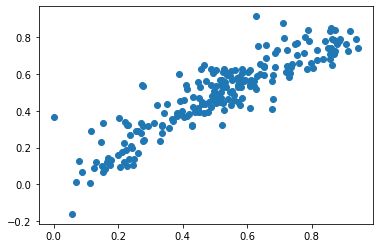

In [245]:
### y_test Vs y_test_pred
plt.scatter(y_test,y_test_pred)

### Serialization

In [247]:
#Unloading the model
import pickle
pickle.dump(lr9,open('bike_model.pkl','wb'))

In [279]:
pickle.dump(final_columns,open('features.pkl','wb'))

In [283]:
data_train_scale, data_test_scale = train_test_split(data1,train_size=0.70,test_size=0.30,random_state=100)
scaler1 = MinMaxScaler()
scaler1 = scaler1.fit(data_train_scale[['temp','hum','windspeed']])
pickle.dump(scaler1,open('scaling.pkl','wb'))

In [316]:
scaler2 = MinMaxScaler()
scaler2 = scaler2.fit(data_train_scale[['cnt']])
pickle.dump(scaler2,open('scaling_target.pkl','wb'))

### Deserialization

In [317]:
model = pickle.load(open('bike_model.pkl','rb'))
scaler1 = pickle.load(open('scaling.pkl','rb'))
scaler2 = pickle.load(open('scaling_target.pkl','rb'))

In [256]:
features = pickle.load(open('features.pkl','rb'))

In [252]:
data1 = pd.read_csv("day.csv")

In [253]:
data1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [258]:
features

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'month_July',
 'month_September',
 'weekday_Saturday',
 'weathersit_Cloudy',
 'weathersit_Light Rain']

In [260]:
model_input = data1.loc[0,:]

In [301]:
model_input

instant              1
dteday        1/1/2018
season               1
yr                   0
mnth                 1
holiday              0
weekday              6
workingday           0
weathersit           2
temp           14.1108
atemp          18.1812
hum            80.5833
windspeed      10.7499
casual             331
registered         654
cnt                985
Name: 0, dtype: object

In [323]:
#writing a function which will take the input into the original form and convert it to input for the model 
def predict_bike_sale(s1,model,scaler1,scaler2):
    yr = s1.yr
    workingday = s1.workingday
    
#mapping season    
    if s1.season == 1: 
        season_spring = 1
        season_winter = 0
    elif s1.season == 4:
        season_spring = 0
        season_winter = 1
    else:
        season_spring = 0
        season_winter = 0

#mapping Months
    if s1.mnth == 7:
        month_July = 1
        month_September = 0
    elif s1.mnth == 9:
        month_July = 0
        month_September = 1
    else:
        month_July = 0
        month_September = 0

#Mapping Saturday
    if s1.weekday == 6:
        weekday_Saturday = 1
    else:
        weekday_Saturday = 0

#Mapping weathersit         
    if s1.weathersit == 2:
        weathersit_Cloudy = 1
        weathersit_Light_Rain = 0
    elif s1.weathersit == 3:
        weathersit_Cloudy = 0
        weathersit_Light_Rain = 1
    else:
        weathersit_Cloudy = 0
        weathersit_Light_Rain = 0

#Scaling the numeric variable
    scaled_output = scaler1.transform(np.array(s1[['temp','hum','windspeed']]).reshape(1,3))
    temp, hum, windspeed = scaled_output[0,0], scaled_output[0,1], scaled_output[0,2]
    
   
    sale_predict = model.predict(np.array([1,yr, workingday, temp, hum, windspeed, season_spring, 
                                          season_winter, month_July, month_September, weekday_Saturday, 
                                          weathersit_Cloudy, weathersit_Light_Rain]).reshape(1,-1))

    return scaler2.inverse_transform(sale_predict.reshape(1,1))

In [327]:
sale = predict_bike_sale(model_input,model,scaler1,scaler2)
print(sale)

[[1192.01078039]]


In [326]:
import dill
dill.dump_session('notebook.db')

In [328]:
sale = predict_bike_sale(data1,model,scaler1,scaler2)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().